In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv
/kaggle/input/usa-state-census/data/usa-states-census-2014.cpg
/kaggle/input/usa-state-census/data/usa-states-census-2014.dbf
/kaggle/input/usa-state-census/data/usa-states-census-2014.qpj
/kaggle/input/usa-state-census/data/usa-states-census-2014.shx
/kaggle/input/usa-state-census/data/usa-states-census-2014.shp.xml
/kaggle/input/usa-state-census/data/usa-states-census-2014.shp
/kaggle/input/usa-state-census/data/usa-states-census-2014.prj
/kaggle/input/usa-state-census/data/1950-2018-torn-aspath/1950-2018-torn-aspath/1950-2018-torn-aspath.prj
/kaggle/input/usa-state-census/data/1950-2018-torn-aspath/1950-2018-torn-aspath/1950-2018-torn-aspath.shp
/kaggle/input/usa-state-census/data/1950-2018-torn-aspath/1950-2018-torn-aspath/1950-2018-torn-aspath.dbf
/kaggle/input/usa-state-census/data/1950-2018-torn-aspath/1950-2018-torn-aspath/1950-2018-torn-aspath.shx
/kaggle/input/usa-state-census/data/1950-2018-torn-aspath/1950-2018-torn-aspath

In [2]:
!ls ../input/us-accidents

US_Accidents_March23.csv


In [3]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [4]:
df=pd.read_csv('../input/us-accidents/US_Accidents_March23.csv')

In [5]:
#changing start_time and end_time to features
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

## City Analysis



In [6]:
city_df=pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'city','City':'Accident Cases'})

In [7]:
city_df.describe()

,Accident Cases
count,13678.000000
mean,565.005191
std,4147.357347
min,1.000000
25%,6.000000
50%,35.000000
75%,201.000000
max,186917.000000


In [8]:
# since there are 13678 cities, We pick only top-20 for vis purpose
top_20_cities = pd.DataFrame(city_df.head(20))
top_20_cities.head()

,city,Accident Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939


In [9]:

cmap = cm.get_cmap('viridis', 20)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

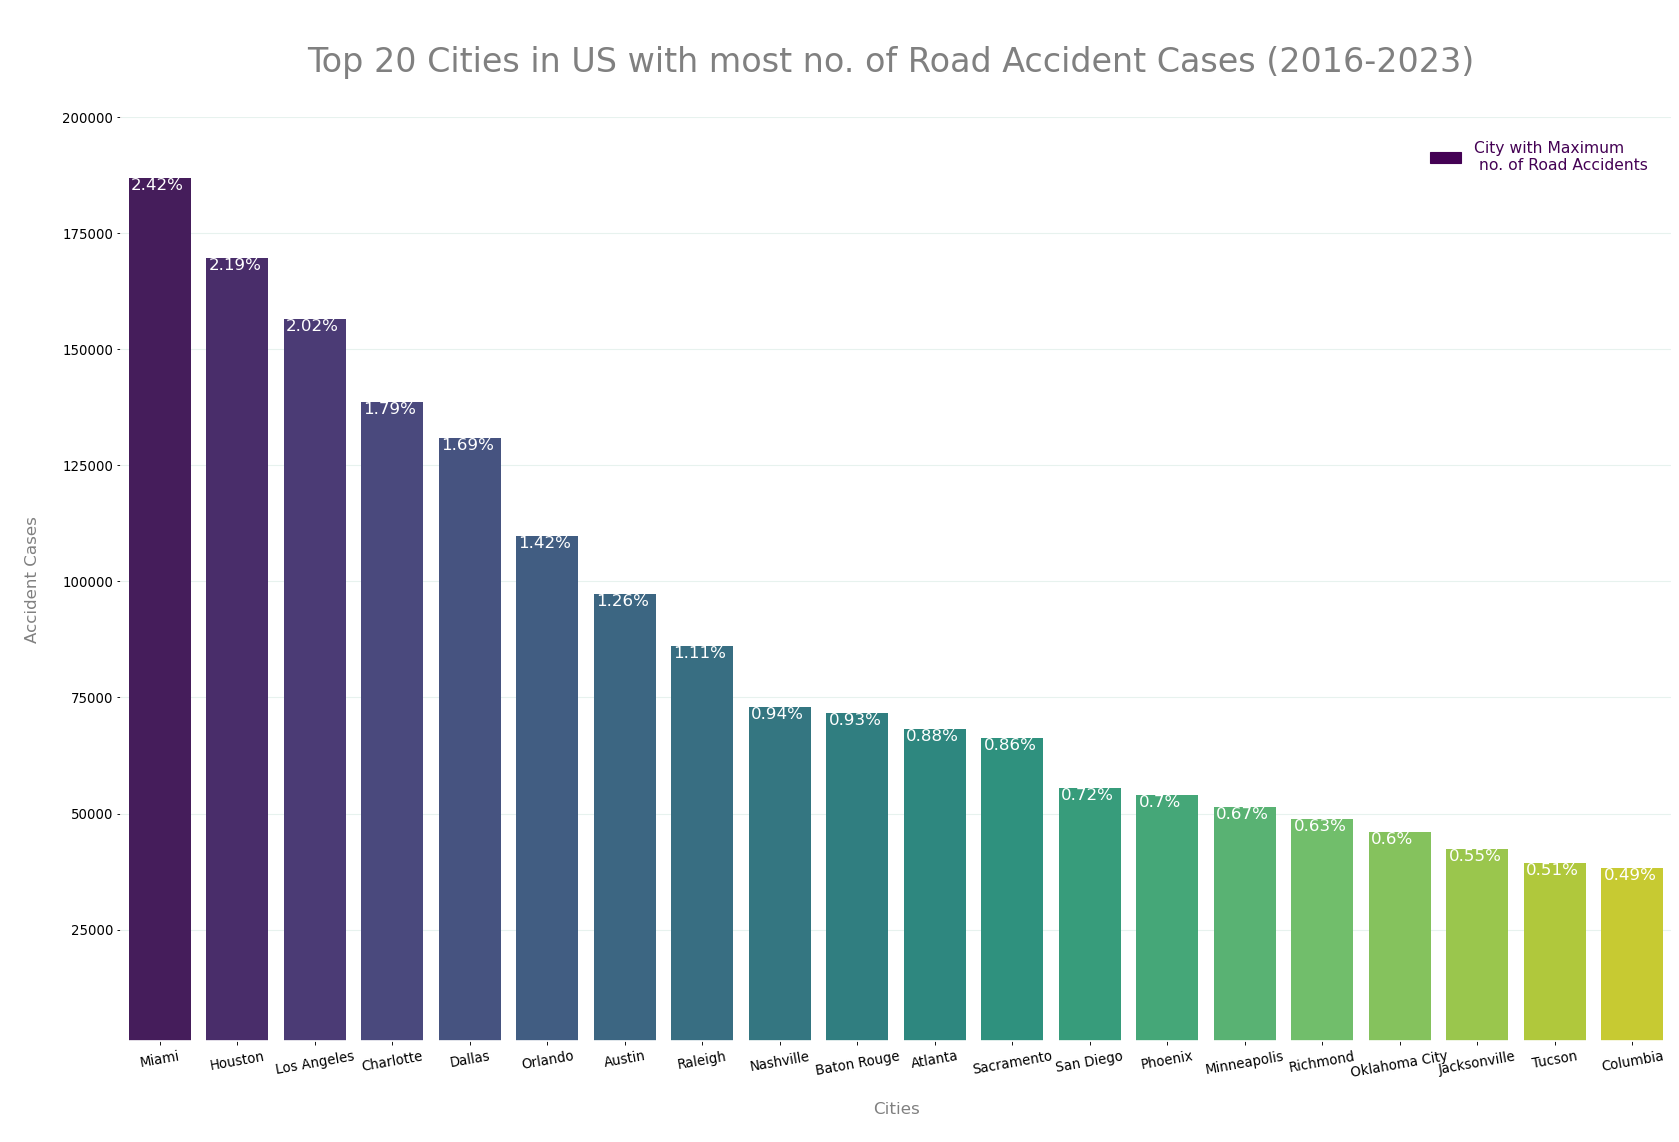

In [10]:
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

fig, ax = plt.subplots(figsize = (25,15), dpi = 80)

ax=sns.barplot(y=top_20_cities['Accident Cases'], x=top_20_cities['city'], palette='viridis')

total = sum(city_df['Accident Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, color='white')

plt.title('\nTop 20 Cities in US with most no. of Road Accident Cases (2016-2023) \n', size=30, color='grey')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 200000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 14}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

INSIGHTS 

* **MIAMI** has highest 
* **COLUMBIA** has lowest 
* Top 10 have Almost **14%** Accidents. While the Top 20 Account for Top **22%** out of 13678 cities.

In [11]:
AccidentsInMiami=top_20_cities['Accident Cases'][0]  
YearlyAccidentsInMiami=AccidentsInMiami/8
DailyAccidentsInMiami=YearlyAccidentsInMiami/365
print(AccidentsInMiami,DailyAccidentsInMiami)


186917 64.01267123287671


INSIGHTS 
* the past 8 years, 186917 accidents happend in MIami, averaging 64 accidents Per Year.

In [12]:
states = gpd.read_file('../input/usa-state-census/data')

In [13]:
geolocator = Nominatim(user_agent="RandomGuy")
Top20Locations=top_20_cities['city'].apply(lambda x: geolocator.geocode(x))


In [14]:
geometry=[Point(x.longitude,x.latitude) for x in Top20Locations]
geo_df_cities = gpd.GeoDataFrame(top_20_cities, geometry=geometry)

In [15]:
top_20_city_list=list(top_20_cities['city'])
top_20_city_list

['Miami',
 'Houston',
 'Los Angeles',
 'Charlotte',
 'Dallas',
 'Orlando',
 'Austin',
 'Raleigh',
 'Nashville',
 'Baton Rouge',
 'Atlanta',
 'Sacramento',
 'San Diego',
 'Phoenix',
 'Minneapolis',
 'Richmond',
 'Oklahoma City',
 'Jacksonville',
 'Tucson',
 'Columbia']

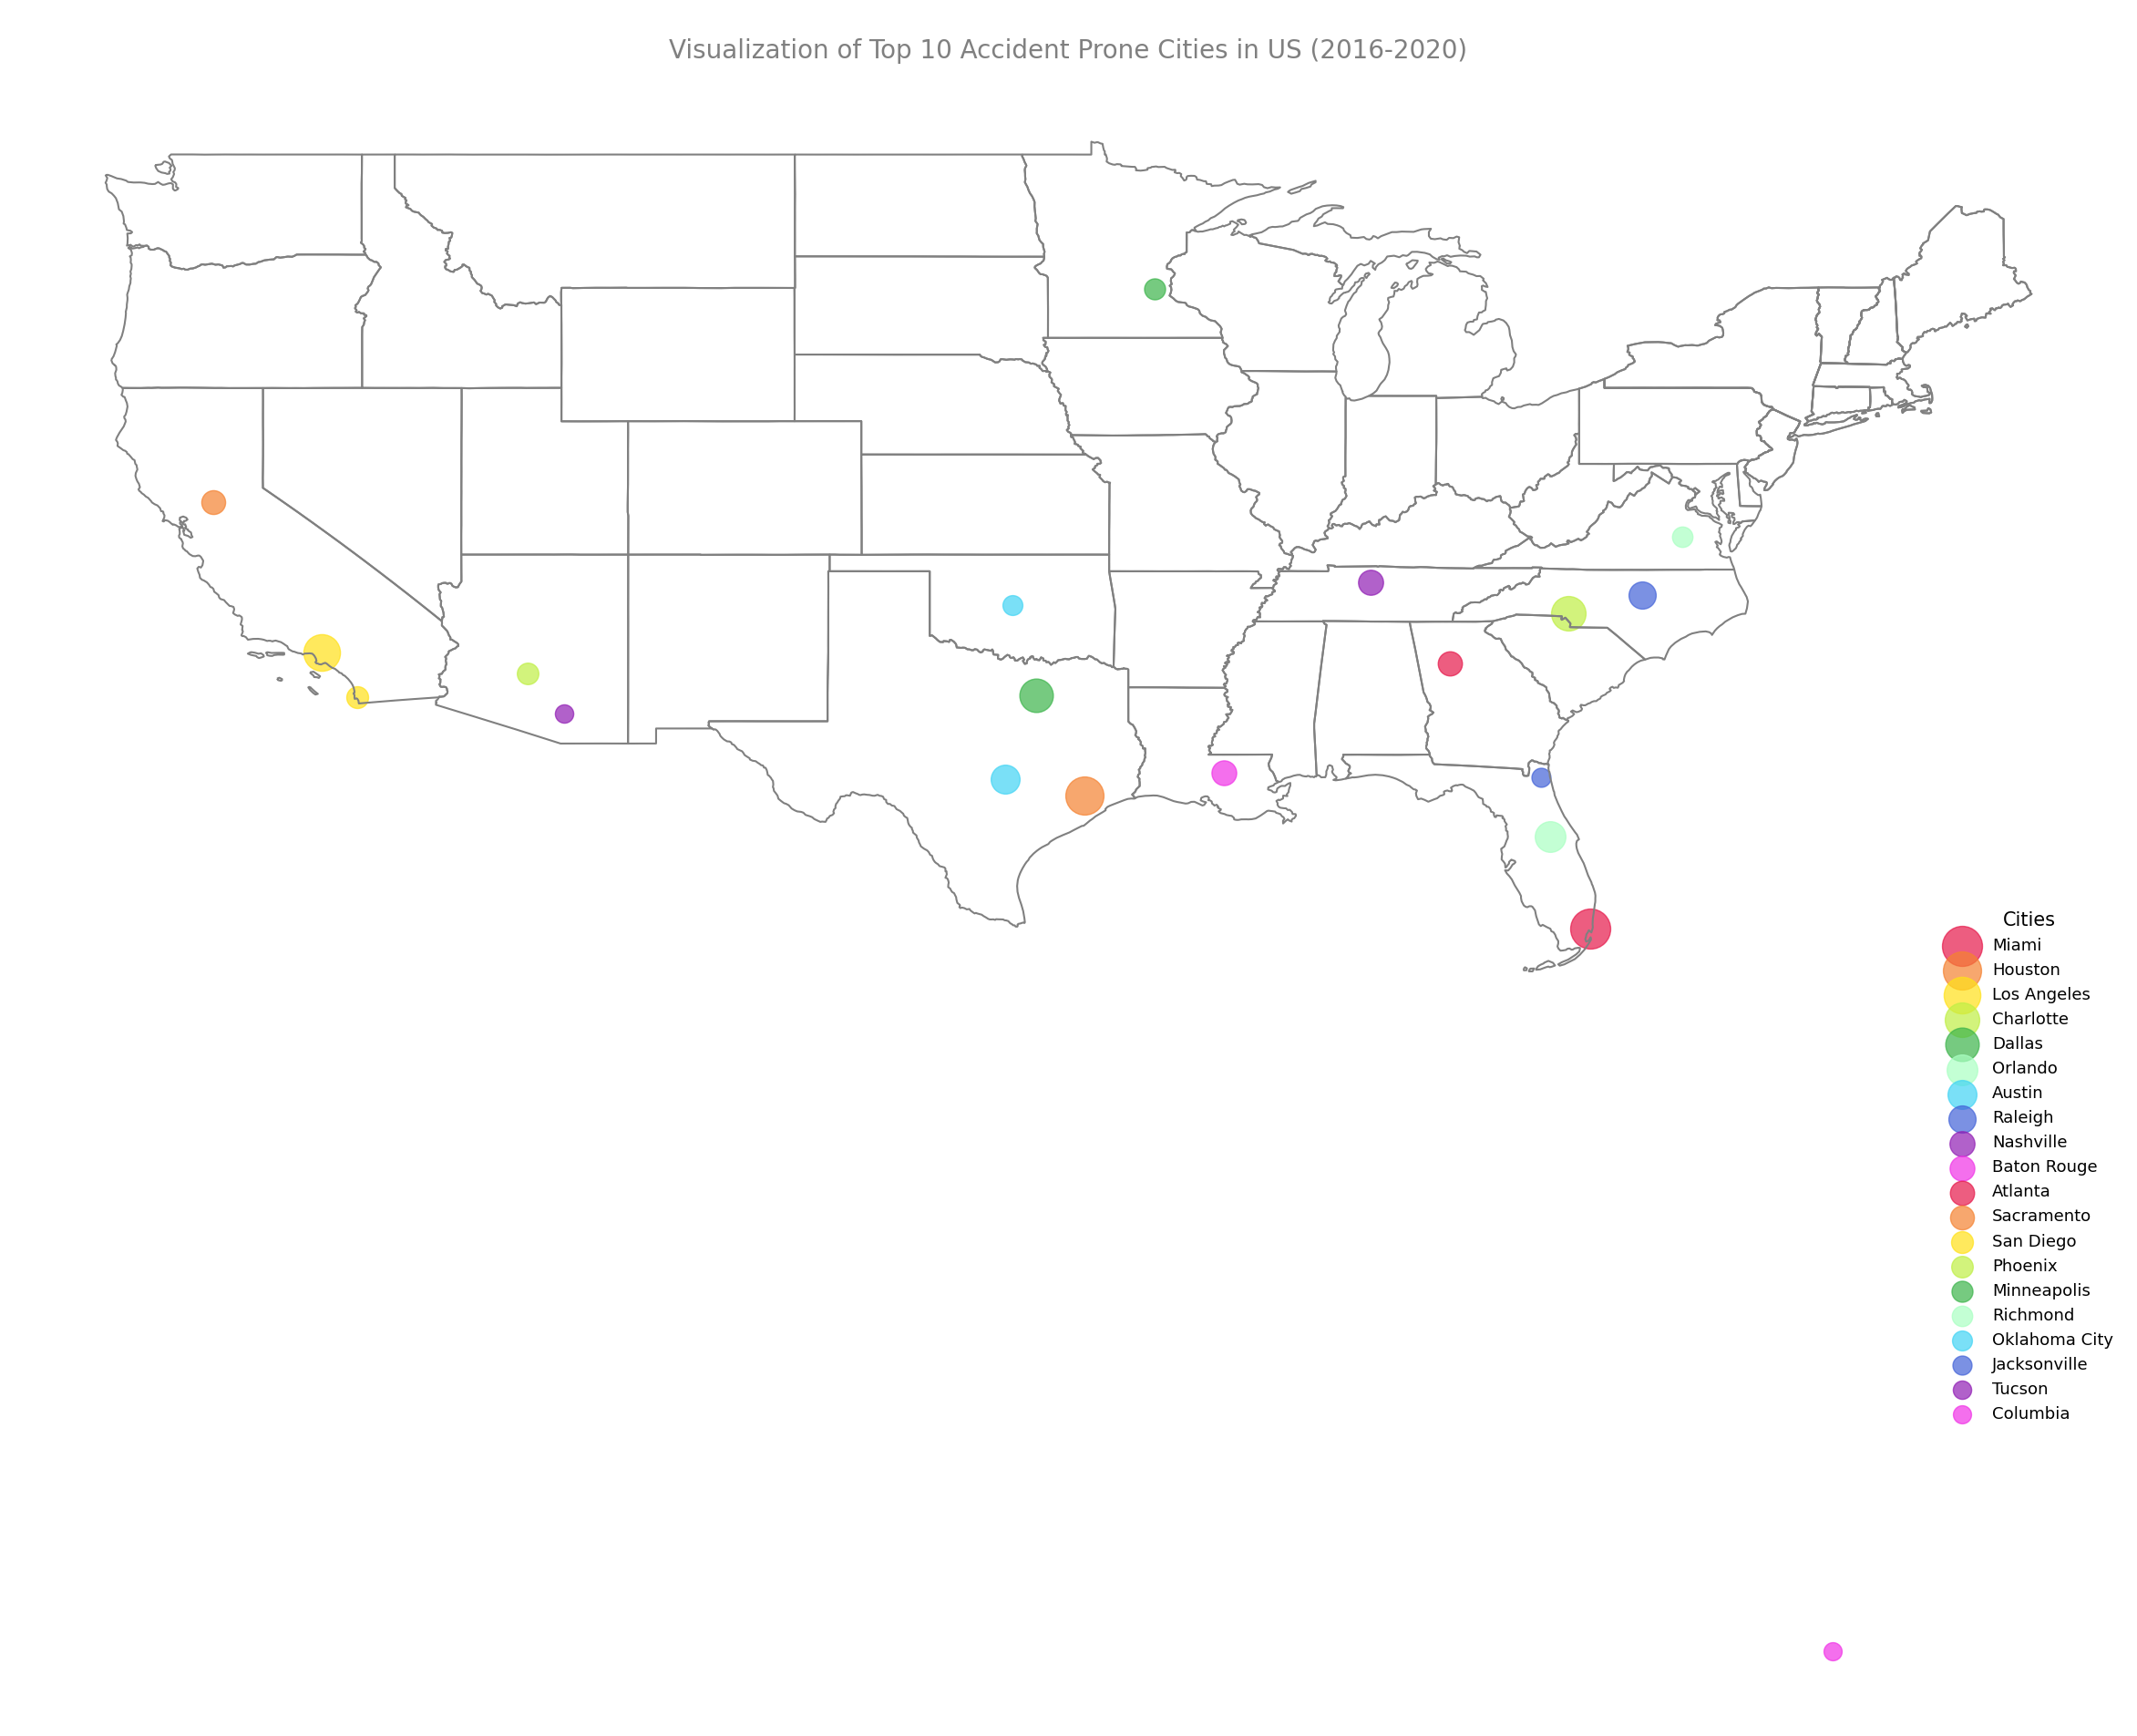

In [16]:
fig, ax = plt.subplots(figsize=(30,30))
# ax.set_xlim([-125,-65])
# ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='grey');

colors = ['#e6194B','#f58231','#ffe119','#bfef45','#3cb44b', '#aaffc3','#42d4f4','#4363d8','#911eb4','#f032e6',
          '#e6194B','#f58231','#ffe119','#bfef45','#3cb44b', '#aaffc3','#42d4f4','#4363d8','#911eb4','#f032e6']

markersizes =  top_20_cities['Accident Cases']/top_20_cities['Accident Cases'][0]*1000

for i in range(20):
    geo_df_cities[geo_df_cities['city'] == top_20_city_list[i]].plot(ax=ax, markersize=markersizes[i], 
                                                                      color=colors[i], marker='o', 
                                                                      label=top_20_city_list[i], alpha=0.7);
    
plt.legend(prop={'size': 13}, loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), edgecolor='white', title="Cities", title_fontsize=15);

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone Cities in US (2016-2020)', size=20, color='grey');


INSIGHTS 
* 9 Out of Top 20 cities are in just 3 states, Texas, California and MIami.

## States Analysis

In [17]:
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

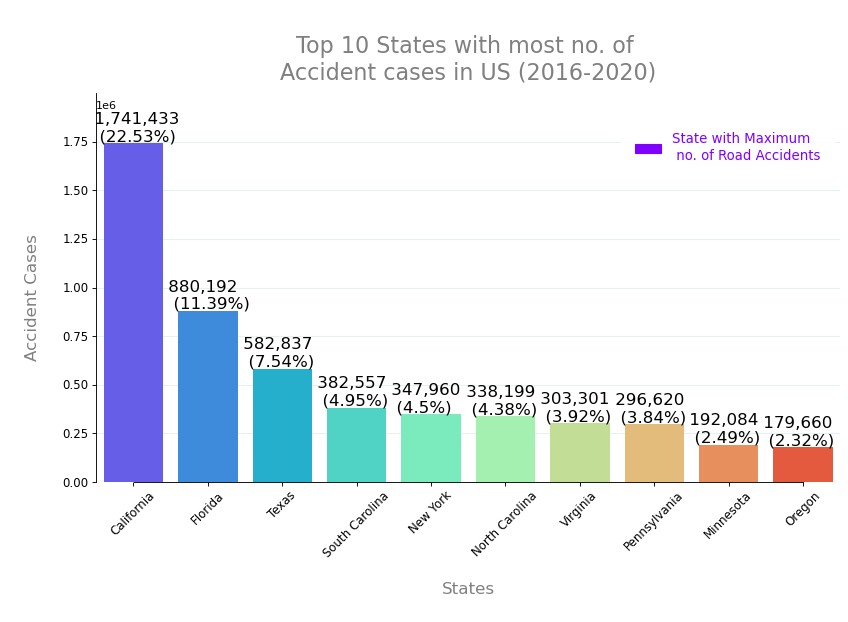

In [18]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='rainbow')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=15,
                color='black')

ax.set(ylim =(0, 1900000))


plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2020)\n', size=20, color='grey')

ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 2000000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=45)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 12}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

INSIGHTS
* In US, California is the state with highest no. of road accidents in past 5 years.
* About 22% of the total acidents records of Pat 5 years in US is only from California.
* In Past 8 years, 597 accident happened daily in California.
* Florida is the 2nd highest (11% cases) state for no. road accidents in US.

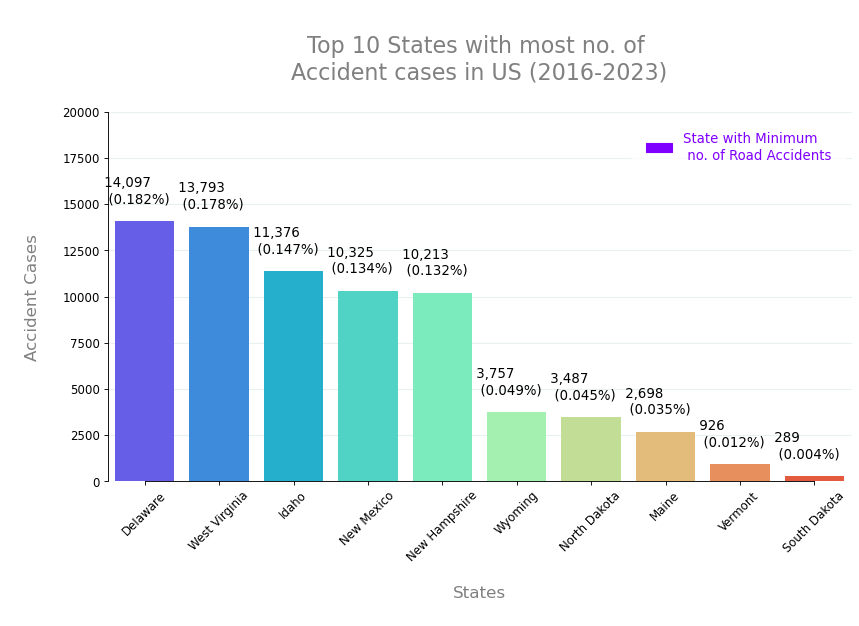

In [19]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].tail(10), x=state_df['State'].tail(10), palette='rainbow')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+1000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 3)), fontsize=12,
                color='black')

ax.set(ylim =(0, 20000))


plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2023)\n', size=20, color='grey')

ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)

    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 20000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=45)

MA = mpatches.Patch(color=clrs[0], label='State with Minimum \n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 12}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

INSIGHTS 
* South Dakota is the city with lowest no. of road accidents in past 5 years.

* Only 213 accidents took place in South Dakota in past 5 years implies yearly 42 cases in average.

## Timezone Analysis


In [20]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

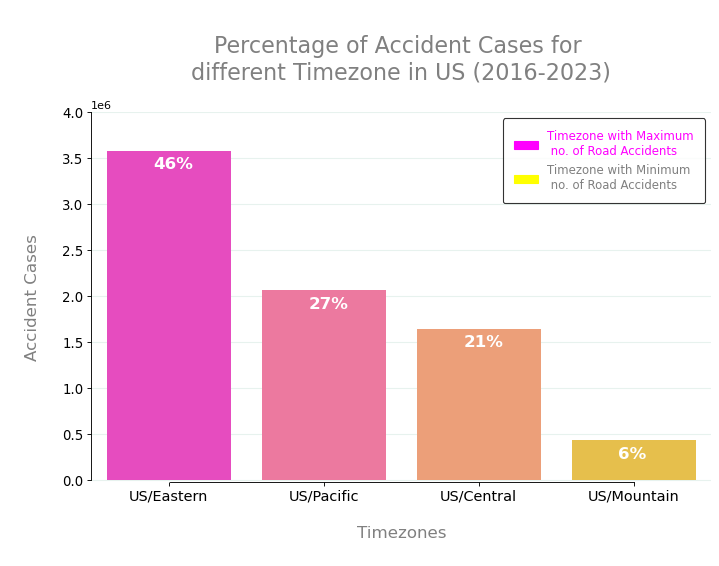

In [21]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)

cmap = cm.get_cmap('spring', 4)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='spring')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()-200000, \
            '{}%'.format(round(i.get_height()*100/total)), fontsize=15,weight='bold',
                color='white')
    

plt.ylim(-20000, 4000000)
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2023)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nTimezones\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 3)
ax.spines['left'].set_bounds(0, 4000000)

MA = mpatches.Patch(color=clrs[0], label='Timezone with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Timezone with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='black');


INSIGHTS
* Eastern TimeZone has the maximum accidents (39%).
* Mountain TimeZone has the minimum car accidents (6%).

## Street Analysis

In [22]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [23]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

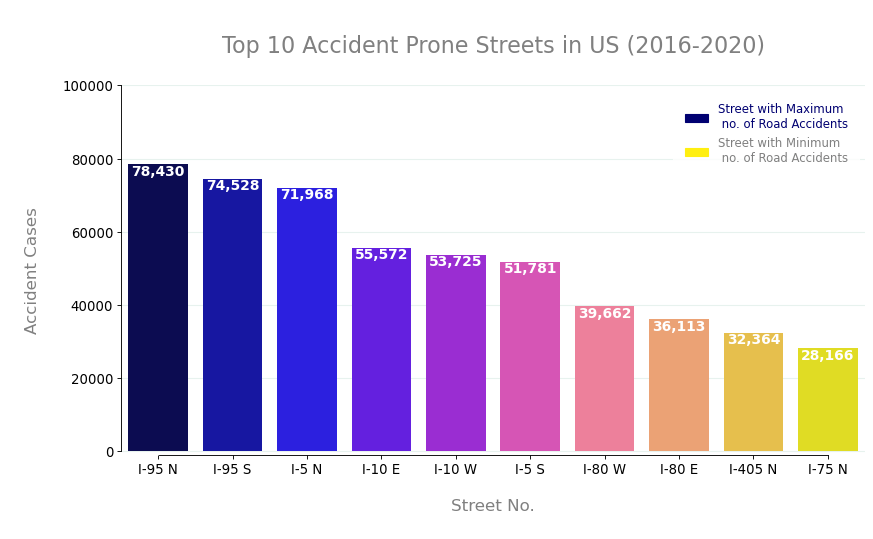

In [24]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-3000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 100000)

plt.title('\nTop 10 Accident Prone Streets in US (2016-2020)\n', size=20, color='grey')


ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)


    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 100000)

ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

INSIGHTS 



*  In last 8 years Street No. I-95 N is having the highest road accidents records at 78430, closely followed by I-95 S at74,528 Accidents
*   In Street No. I-95 N, daily 26 accidents occurred on average.




In [25]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

129,934 Streets, 38.64%
326,421 Streets, 97.06%
335,489 Streets, 99.76%
817 Streets, 0.24%
133 Streets, 0.04%


INSIGHTS

* There are 129,934 Streets(38.64%) in US which have only 1 accident record in past 5 years.
* 97% Streets Of US have less than 100 road accidents cases.
* Only 0.24 % Streets have greater than 1000 cases and only 16% of them have greater than 5000 accidents.


## Time Analysis

### Accident Duration Analysis


In this dataset we have Start_Time & End_Time for the timings of each accident. Start_Time shows start time of the accident in local time zone. End_Time shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow. The time recorded has the lowest unit of seconds, i.e., time of 29 min 05 sec is different from 29 min 10 sec. For our analysis, I have rounded off time to the nearest multiple of 5. 


In [26]:

duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})
duration_df['Duration']= duration_df['Duration'].dt.round('05min')

top_10_accident_duration_df = pd.DataFrame(duration_df['Duration'].value_counts().head(10)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})
Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]
top_10_accident_duration_df['Duration'] = Duration

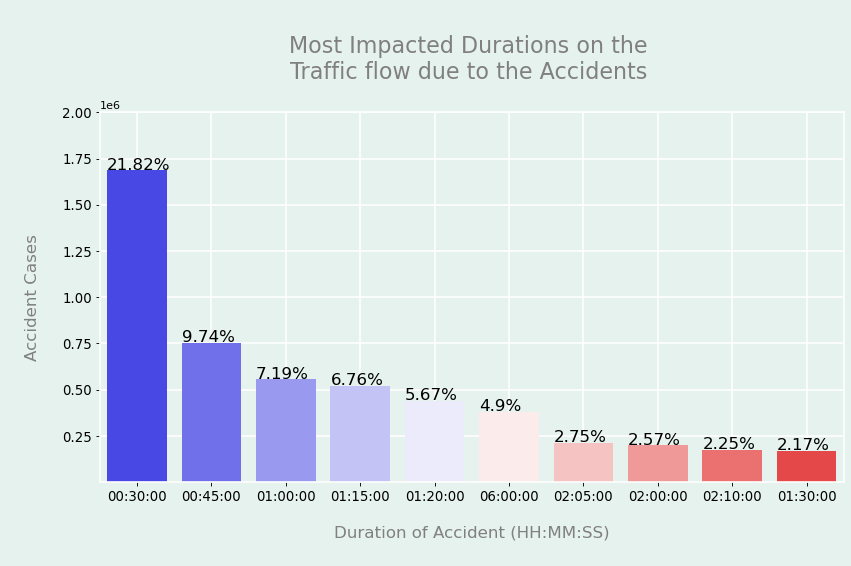

In [27]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = cm.get_cmap('bwr', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 2000000))


plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')


ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)

    
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpatches.Patch(color=clrs[-3], label='Duration with Maximum\n no. of Road Accidents')


INSIGHTS 
* From the above plot, it is inferred that majority (21.82%) of road accidents, have impacted on the traffic flow for 30 minutes.
* While all the times in the figure lie within 2 hours, theres an outlier of 6 hours that occurs 4.9 hours. An anlysis on severity of the accident can throw more light on this.

## Year Analysis

In [28]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

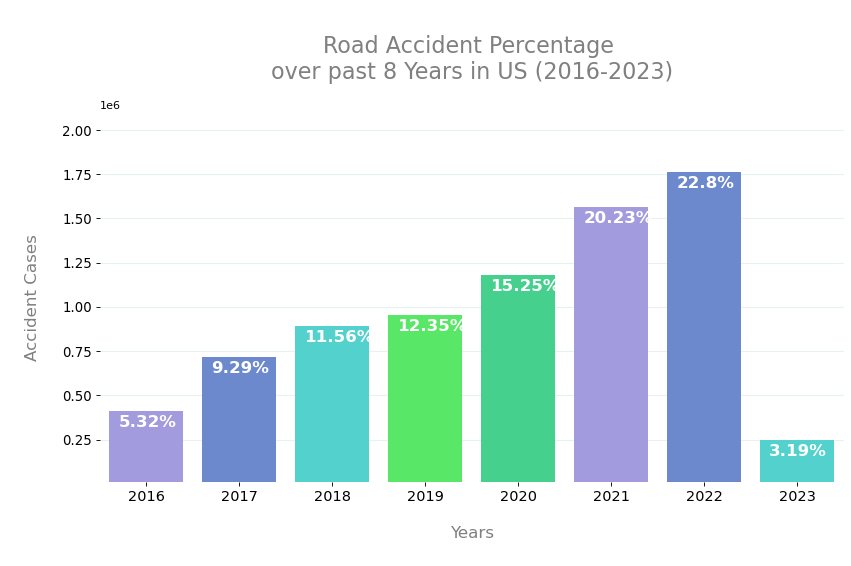

In [29]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-90000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(10000, 2100000)
plt.title('\nRoad Accident Percentage \nover past 8 Years in US (2016-2023)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    

for k in ['top', 'right', "bottom", 'left']:
        side = ax.spines[k]
        side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)
plt.show()

INSIGHTS 
 * From the above figure, it is clear that in last8 years (2016-2023) in US accidents percentage has increased significantly.
 
 * 45% of the total road accident records of last 5 years happened only within last 3 years (2021, 2022,2023).



## Month Analysis

In [30]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

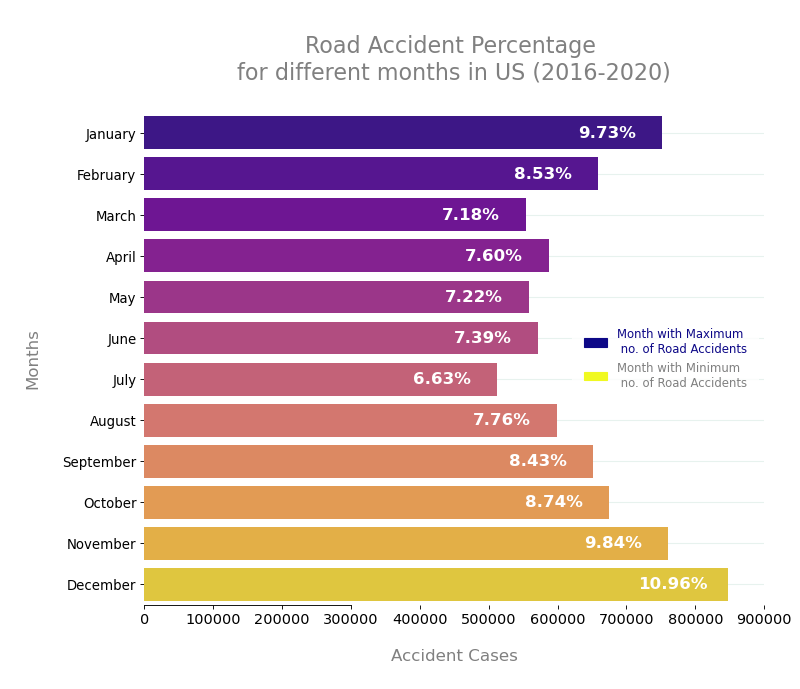

In [31]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='plasma')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-80000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='white', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different months in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nMonths\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 900000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 300000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Month with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Month with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');


INSIGHTS 

 * Around 10% of the road accidents occurred in the month of December.

 * July is month with least (6.63%) no. of road accidents in US.

 * A quater of the road accidents occurred only within the winter months ( December, January and February).
 
 *  Autumn months (transition period during Sept. October, and November)(27%) seem to dominate in terms of accidents as compared to Summer that has the lowest (21.78%).



## Day Analysis

In [32]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

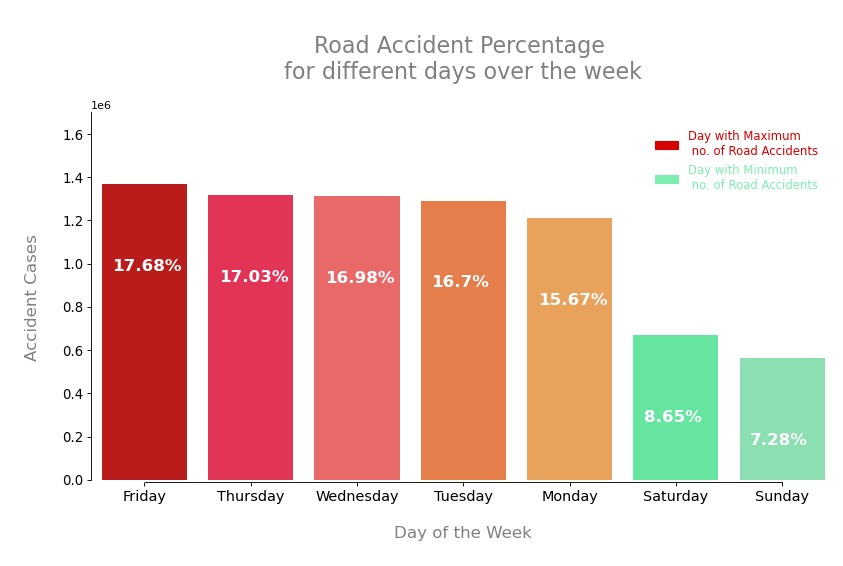

In [33]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-400000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(-10000, 1700000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 1700000)

MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);

INSIGHTS

*     Working Days of the week have almost 5 times higher accident percentage, compared with the Weekend Days which is as our expectation. 
*   Only around 16% road accident records occurred in weekend.

*     Friday of a week is having the highest percentage of road accidents.

*    On Sunday the percentage of road accidents in US is lowest.



In [34]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

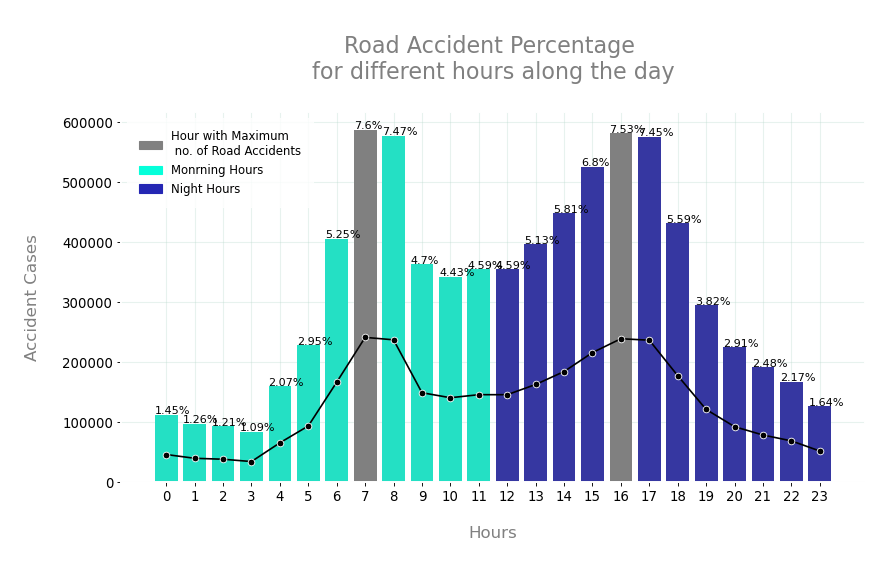

In [35]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'black', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 1500000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');


INSIGHTS 
 * Around 30% of the road accidents occurred in between 2:00PM to 6:00PM.

 * Road accidents show an increasing trend during office commute hours (4-7 AM and 12-4:00 PM).

 * The most-deadliest accident hours is 7:00AM implies the Morning Office-Going Hours.

* The 2nd most-deadliest accident hour is 4:00PM  implies the  Evening Office-Returning Hours.



## TODO :Weather Analysis